In [90]:
#Import libraries
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pathlib
import glob

from PIL import Image
import IPython

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [2]:
#Working with local Flower dataset, structred as:
# flower_photo/
#   daisy/
#   dandelion/
#   roses/
#   sunflowers/
#   tulips/

In [43]:
#Import images
data_dir = r'D:\Website\Hyde\MachineLearning_Tensorflow\flower_photos'

#Convert path to a windows path for easy image loading
data_dir = pathlib.Path(data_dir)

#Load all images for a quick count
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total images in folder: ", image_count)

Total images in folder:  3670


### Viewing images

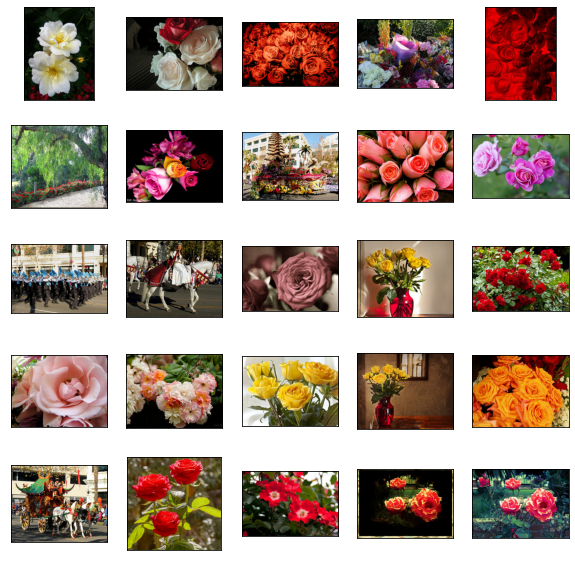

In [66]:
#Load images from 'roses' folder
roses = list(data_dir.glob('roses/*'))
# Image.open(str(roses[4]))    # To display a single image

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(plt.imread(str(roses[i])))
    # plt.xlabel(class_names[train_labels[i]])
plt.show()

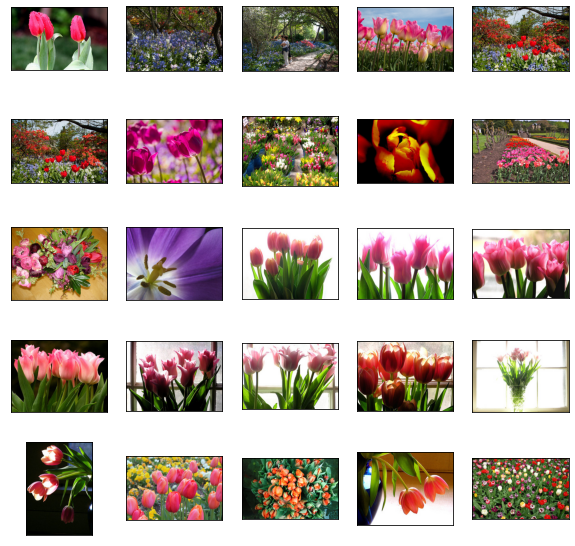

In [69]:
#Load images from 'roses' folder
tulips = list(data_dir.glob('tulips/*'))
# Image.open(str(roses[4]))    # To display a single image

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(plt.imread(str(tulips[i])))
    # plt.xlabel(class_names[train_labels[i]])
plt.show()

### Load images using Keras Utility

In [73]:
#Dataset parameters
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 0,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 0,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

#Note - Does validation subset have the same images from training subset?


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [75]:
#Class names
class_names = train_ds.class_names
print("Class names: ", class_names)

Class names:  ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### Visualize datasets

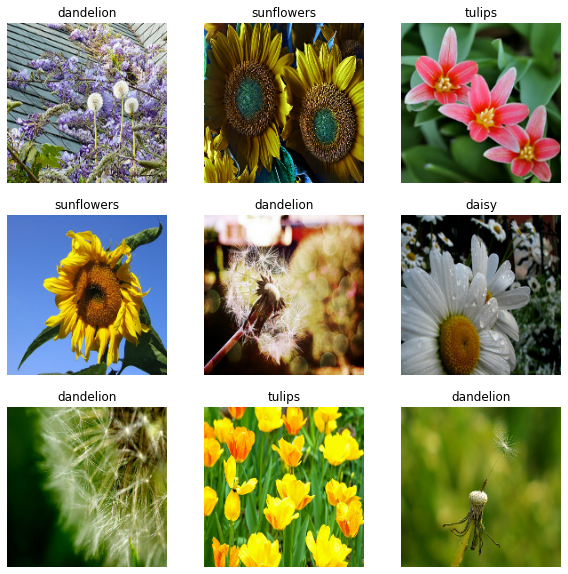

In [77]:
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [80]:
#Batch sizes
for image_batch, labels_batch in train_ds:
    print("Image batch shape: ",image_batch.shape)
    print("Label batch shape: ",labels_batch.shape)
    break

Image batch shape:  (32, 180, 180, 3)
Label batch shape:  (32,)


- Image batch is a tensor of shape (32, 180, 180, 3).
    - Batch of 32 images with each image of shape 180x180x3
- Label batch is a tensor of shape (32,)
    - Labels corresponding to 32 images

### Configure dataset for performance

In [82]:
#Dataset cache and prefetch
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Basic Keras Model

In [88]:
#Sequential Model 
#3 convolutional blocks with max pooling for each
#Dense layers with relu activation function

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


#Compile Model
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 64)       

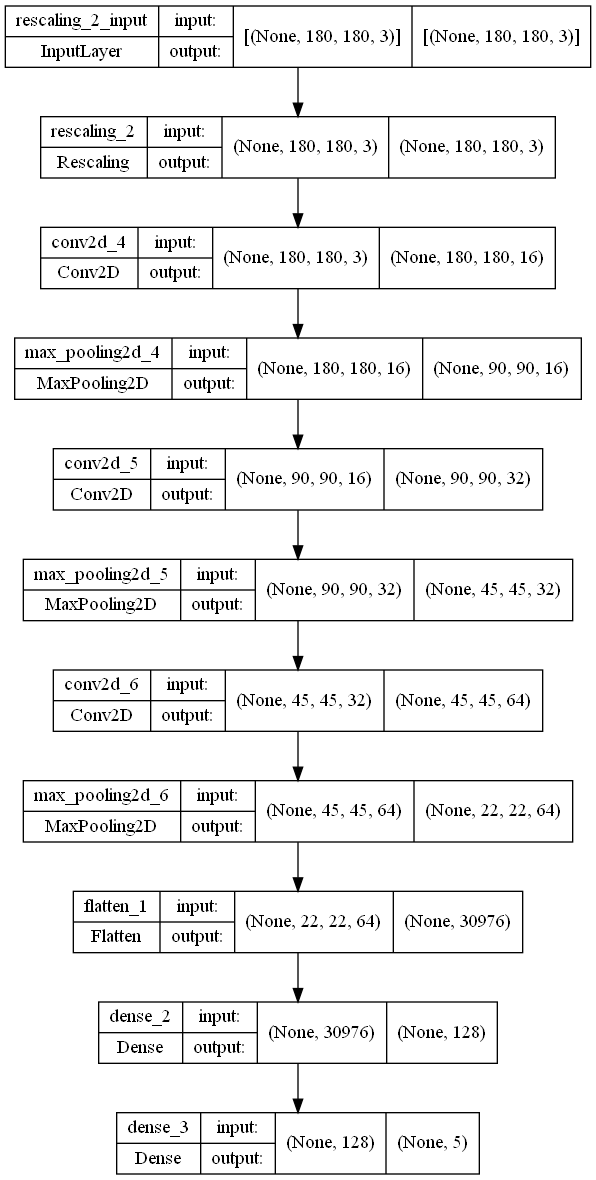

In [95]:
keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image('test_keras_plot_model.png')

### Train the model

In [96]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
92/92 [==============================] - 17s 35ms/step - loss: 1.2657 - accuracy: 0.4700 - val_loss: 1.0330 - val_accuracy: 0.5817
Epoch 2/10
92/92 [==============================] - 2s 23ms/step - loss: 0.9445 - accuracy: 0.6226 - val_loss: 0.9992 - val_accuracy: 0.6281
Epoch 3/10
92/92 [==============================] - 2s 23ms/step - loss: 0.7935 - accuracy: 0.6870 - val_loss: 0.9165 - val_accuracy: 0.6390
Epoch 4/10
92/92 [==============================] - 2s 23ms/step - loss: 0.6067 - accuracy: 0.7684 - val_loss: 0.9952 - val_accuracy: 0.6376
Epoch 5/10
92/92 [==============================] - 2s 23ms/step - loss: 0.3822 - accuracy: 0.8665 - val_loss: 1.1051 - val_accuracy: 0.6417
Epoch 6/10
92/92 [==============================] - 2s 23ms/step - loss: 0.2331 - accuracy: 0.9183 - val_loss: 1.2445 - val_accuracy: 0.6199
Epoch 7/10
92/92 [==============================] - 2s 24ms/step - loss: 0.1224 - accuracy: 0.9625 - val_loss: 1.5165 - val_accuracy: 0.6131
Epoch 8/10
9

### Visualize training results

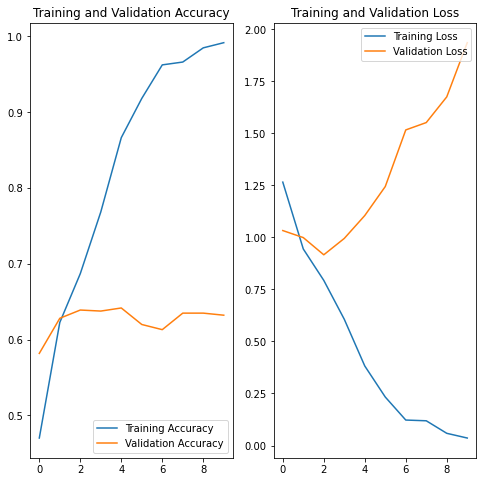

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data augmentation to counter Overfitting

In [99]:
#Using keras processing layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip(
            'horizontal',
            input_shape = (img_height, img_width, 3)
        ),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
    ]
)

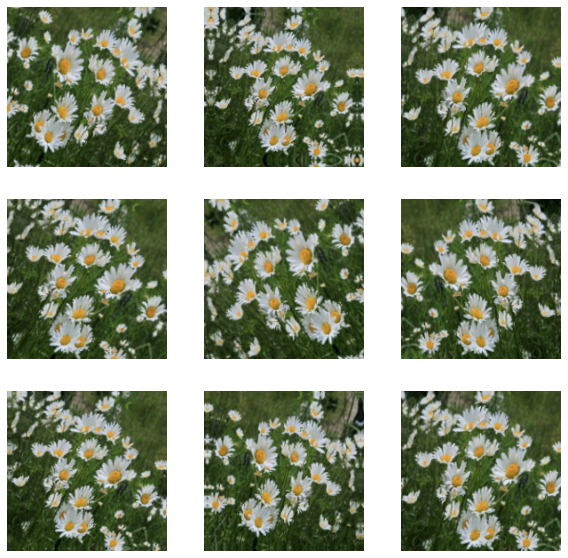

In [102]:
#Visualize images to view augmented examples
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### NN model with augmentation and Dropout

In [103]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


#Compile Model
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [104]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

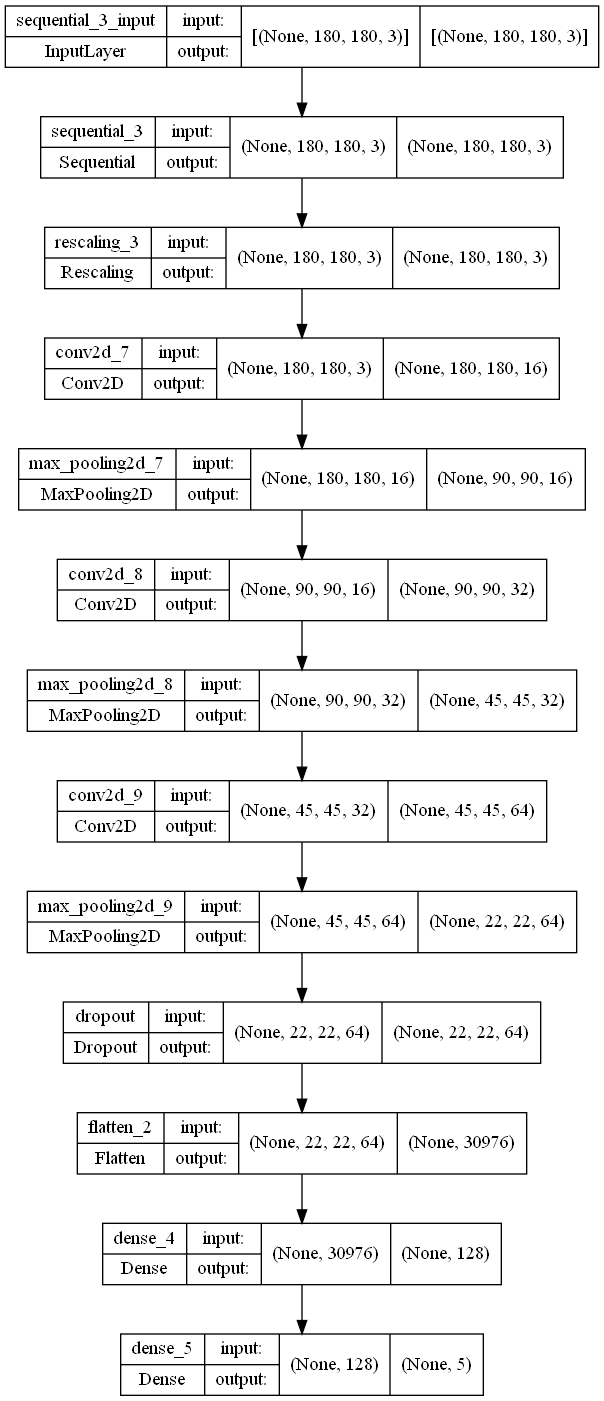

In [105]:
keras.utils.plot_model(model, to_file='test_keras_plot_model_final.png', show_shapes=True)
IPython.display.Image('test_keras_plot_model_final.png')

### Train the model 

In [106]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 3s 28ms/step - loss: 1.3072 - accuracy: 0.4227 - val_loss: 1.1231 - val_accuracy: 0.5245
Epoch 2/15
92/92 [==============================] - 2s 26ms/step - loss: 1.0333 - accuracy: 0.5838 - val_loss: 1.0639 - val_accuracy: 0.5858
Epoch 3/15
92/92 [==============================] - 2s 25ms/step - loss: 0.9235 - accuracy: 0.6396 - val_loss: 1.1955 - val_accuracy: 0.5736
Epoch 4/15
92/92 [==============================] - 2s 25ms/step - loss: 0.8779 - accuracy: 0.6557 - val_loss: 1.0389 - val_accuracy: 0.6240
Epoch 5/15
92/92 [==============================] - 2s 26ms/step - loss: 0.8113 - accuracy: 0.6822 - val_loss: 0.9620 - val_accuracy: 0.6662
Epoch 6/15
92/92 [==============================] - 2s 25ms/step - loss: 0.7360 - accuracy: 0.7132 - val_loss: 0.8578 - val_accuracy: 0.6730
Epoch 7/15
92/92 [==============================] - 2s 26ms/step - loss: 0.7242 - accuracy: 0.7228 - val_loss: 0.8530 - val_accuracy: 0.6812
Epoch 8/15
92

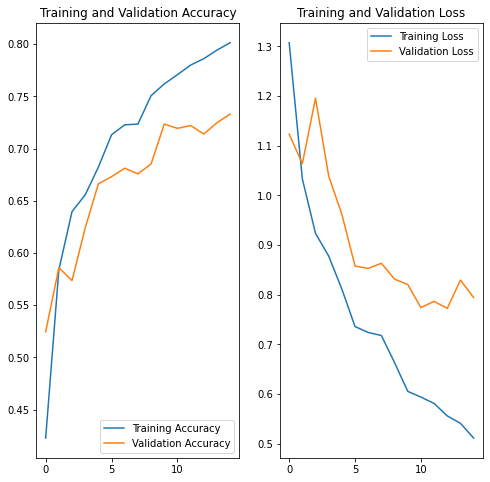

In [107]:
## Plotting results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predict on New Data

This image most likely belongs to sunflowers with a 99.99 percent confidence.


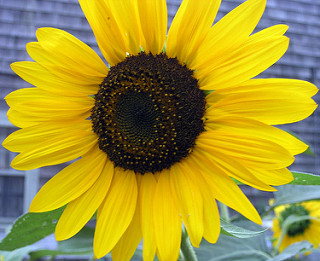

In [136]:
#Import dir of image
img_path = r'D:\Website\Hyde\MachineLearning_Tensorflow\flower_photos\sunflowers\44079668_34dfee3da1_n.jpg'

def predict_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size = (180,180))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) #Convert image to one empty batch -> Model was trained on batches
    prediction = model.predict(img_array)
    score = tf.nn.softmax(prediction[0])
    return score

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predict_image(img_path))], 100 * np.max(predict_image(img_path)))
)

Image.open(img_path)